# Handwritten  digit recognition


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
dftrain = pd.read_csv('train.csv')
print(dftrain.shape)

(42000, 785)


In [3]:
print(dftrain.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
dftrain.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = dftrain.values
print(data.shape, type(data), sep='\n')

(42000, 785)
<class 'numpy.ndarray'>


In [6]:
X = data[:, 1:]
Y = data[:, 0]

print(X.shape, Y.shape, sep='\n')

(42000, 784)
(42000,)


In [7]:
# train test split

split = int(0.8 * X.shape[0])
print(split)

x_train = X[:split, :]
x_test = X[split:, :]

y_train = Y[:split]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


5


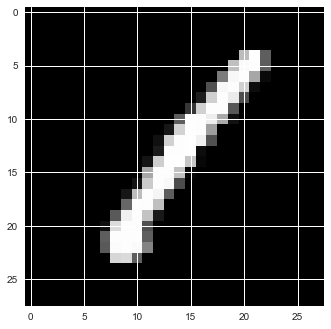

value of y: 1


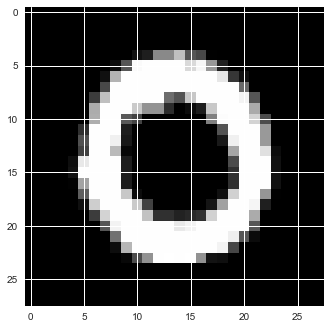

value of y: 0


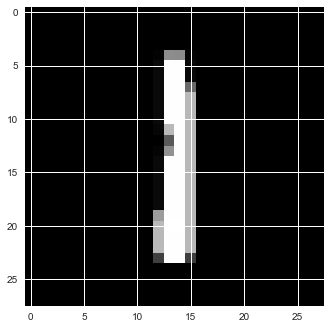

value of y: 1


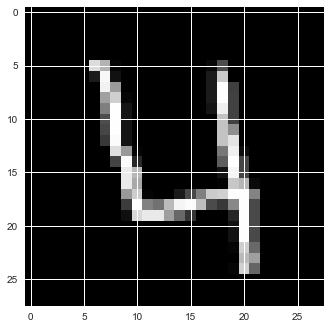

value of y: 4


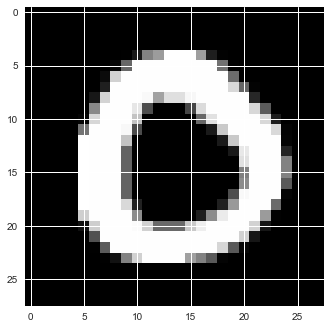

value of y: 0


In [8]:
# Visulaizing some samples

def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.show()
n = int(input())
for i in range(n):
    drawImg(x_train[i])
    print('value of y:',y_train[i])

In [9]:
# KNN Algo
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,querypoint,k=5):
    
    vals=[]
    m = X.shape[0]
    
    for i in range(m):
        #compute distance
        d = dist(querypoint, X[i])
        vals.append((d, Y[i]))
    #sorting the values in vals list    
    vals = sorted(vals)
    #only taking those values which are given input for nearest value
    vals = vals[:k]
    
    #majority vote
    vals = np.array(vals)
    new_value = np.unique(vals[:,1], return_counts=True)
    
    print(new_value)
    
    index = new_value[1].argmax()
    pred = new_value[0][index]
    return pred

In [10]:
n = int(input())
for i in range(0,n):
    pred = knn(x_train, y_train, x_test[i])
    print(int(pred), sep='\n\n')

3
(array([0.]), array([5], dtype=int64))
0
(array([7.]), array([5], dtype=int64))
7
(array([7.]), array([5], dtype=int64))
7


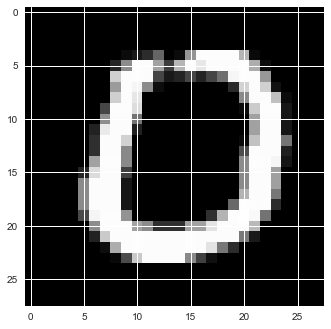

value of y :
0


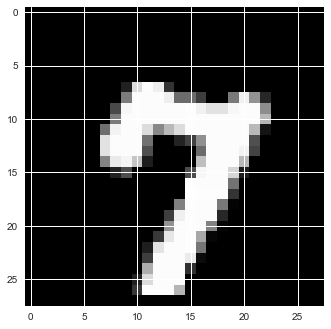

value of y :
7


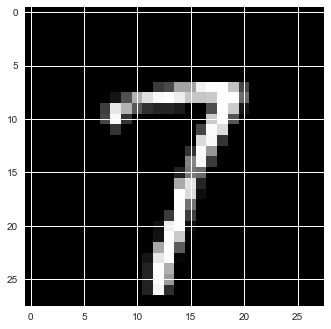

value of y :
7


In [11]:
for i in range(n):
    drawImg(x_test[i])
    print('value of y :', y_test[i],sep='\n')

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


model.fit(X, Y)
print(model.score(x_train, y_train))

C:\Users\abhay verma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9376488095238096
